# Kalman Filtering

In [1]:
import Simulator
import Observation
import Statistics
import KalmanFilter

## Loading simulator 

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators

In [2]:
timestamp = "2022_03_01-17_29_41"

grid, simulator = Simulator.from_file(timestamp)

## Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [3]:
statistics = Statistics.Statistics(simulator, safe_history=True)

Please remember to set priors!


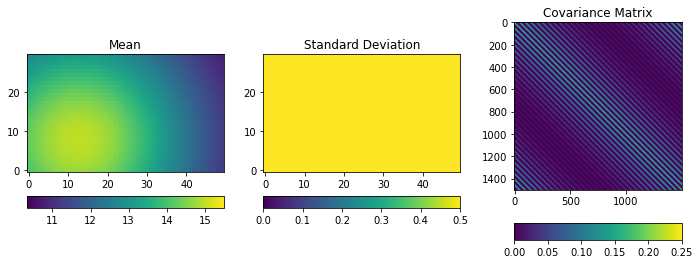

In [4]:
prior_args = Statistics.prior_args_from_file(timestamp)
statistics.set_prior(prior_args)

statistics.plot()

## Loading observations 

Observation positions which are fixed for a setup and values from the truth

In [5]:
obs_timestamp = "2022_03_01-17_29_49"
observation = Observation.from_file(grid, timestamp, obs_timestamp)

Remember to set observation positions and to set/observe values!


## Kalman filtering

Updating/conditioning the distributions at every observation time

In [6]:
# Plots for the paper
import numpy as np
kf_states = np.zeros((11,grid.N_x))
kf_scales = np.zeros((11,grid.N_x))

kf_states[0] = statistics.mean
kf_scales[0] = statistics.stddev

0


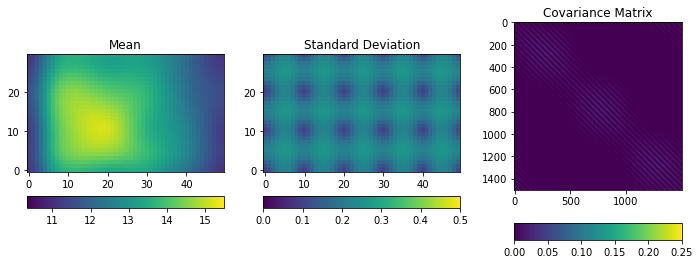

1


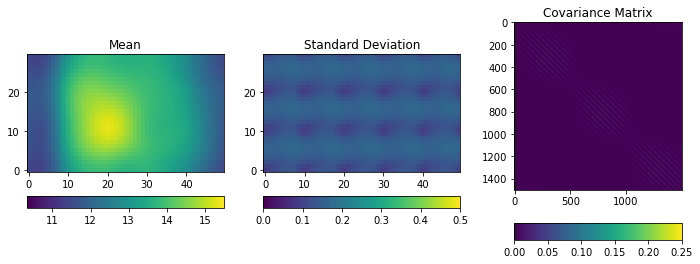

2


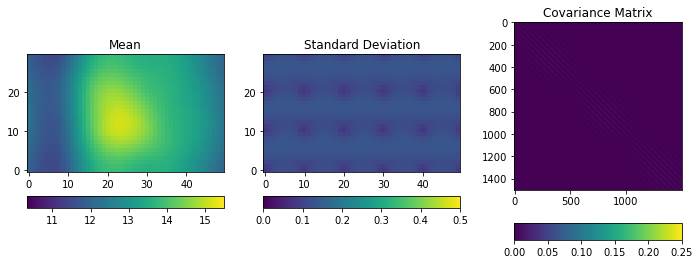

3


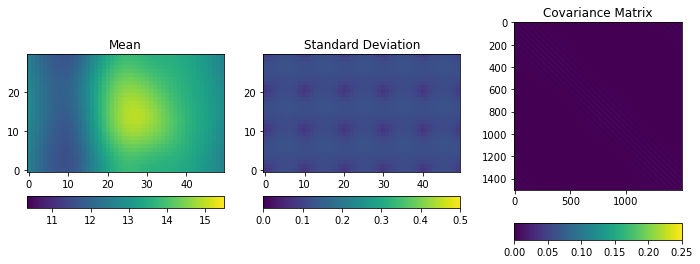

4


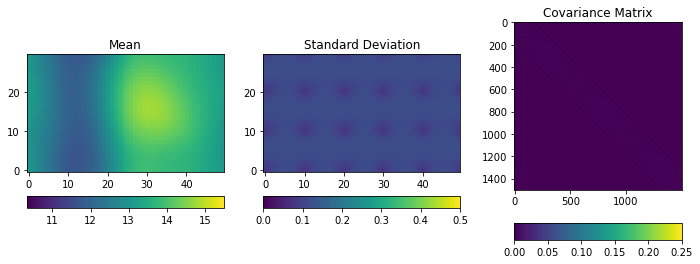

5


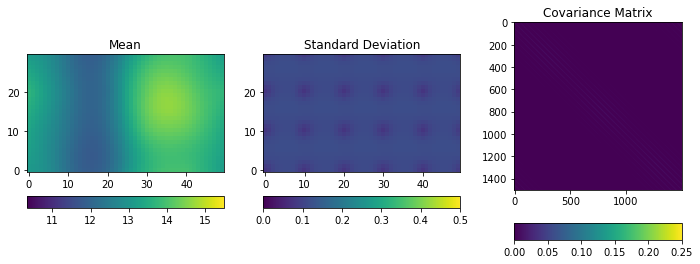

6


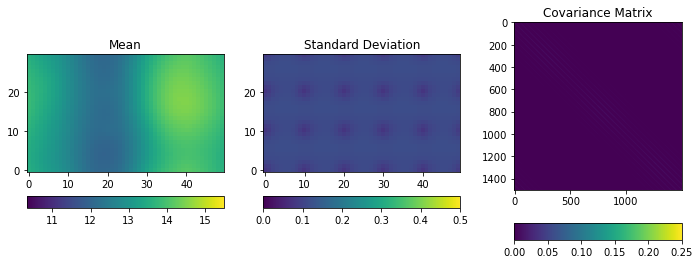

7


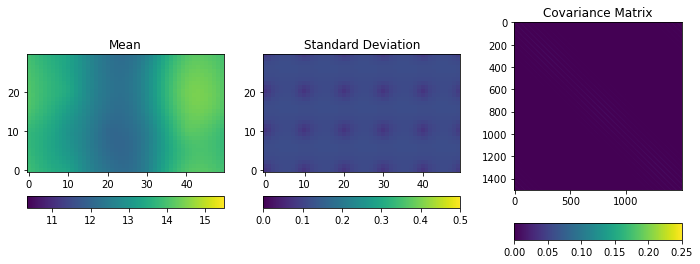

8


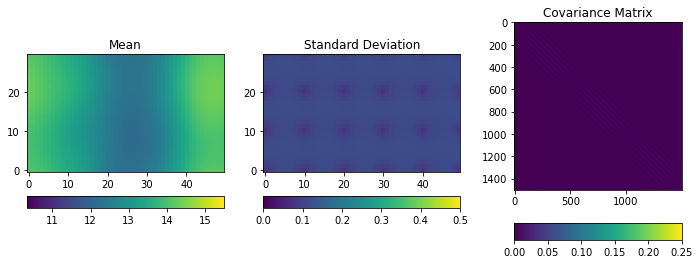

9


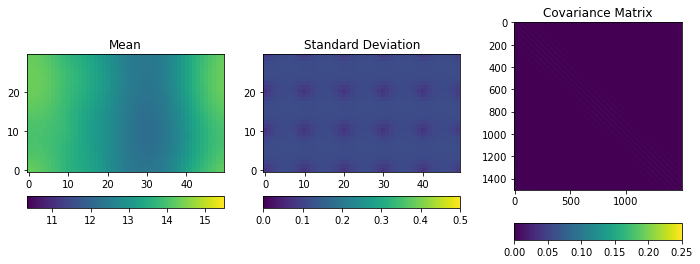

In [7]:
kalmanFilter = KalmanFilter.Kalman(statistics, observation)

for t in range(observation.N_obs):
    print(t)
    statistics.propagate(25)
    kalmanFilter.filter(statistics.mean, statistics.cov, observation.obses[t])
    statistics.plot()

    kf_states[t+1] = statistics.mean
    kf_scales[t+1] = statistics.stddev

## Plots for paper

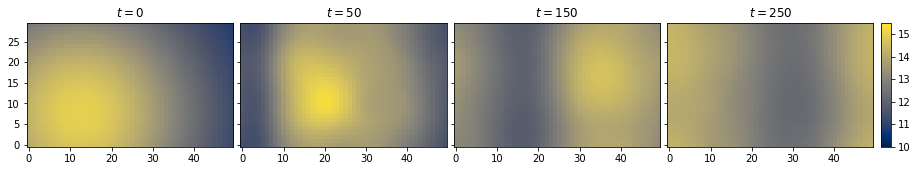

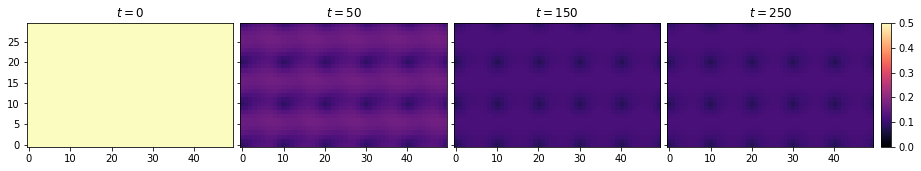

In [10]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

xgrid = np.arange(grid.nx)*grid.dx
ygrid = np.arange(grid.ny)*grid.dy
xgrids, ygrids = np.meshgrid(xgrid,ygrid)

filepath = "experiment_files/experiment_" + timestamp + "/"

fig = plt.figure(figsize=(12,4))

axs = AxesGrid(fig, (0.0,0.0,1.0,1.0), nrows_ncols=(1,4), axes_pad=0.1,
    cbar_mode="single", cbar_location="right", cbar_pad=0.1)

fig0 = axs[0].imshow(np.reshape(kf_states[0],(grid.ny, grid.nx)), origin="lower", vmin=10, vmax=15.5, cmap="cividis")
axs[0].set_title("$t=0$")

table_kf_mean0 = np.column_stack((xgrids.flatten(), ygrids.flatten(), kf_states[0].flatten()))
np.savetxt(filepath + "kf_mean000.csv", table_kf_mean0, header='x, y, val', comments='# ',delimiter=' ', newline='\n',  fmt='%1.4f')


fig1 = axs[1].imshow(np.reshape(kf_states[2],(grid.ny, grid.nx)), origin="lower", vmin=10, vmax=15.5, cmap="cividis")
axs[1].set_title("$t=50$")

table_kf_mean2 = np.column_stack((xgrids.flatten(), ygrids.flatten(), kf_states[2].flatten()))
np.savetxt(filepath + "kf_mean050.csv", table_kf_mean2, header='x, y, val', comments='# ',delimiter=' ', newline='\n',  fmt='%1.4f')


fig2 = axs[2].imshow(np.reshape(kf_states[6],(grid.ny, grid.nx)), origin="lower", vmin=10, vmax=15.5, cmap="cividis")
axs[2].set_title("$t=150$")

table_kf_mean6 = np.column_stack((xgrids.flatten(), ygrids.flatten(), kf_states[6].flatten()))
np.savetxt(filepath + "kf_mean150.csv", table_kf_mean6, header='x, y, val', comments='# ',delimiter=' ', newline='\n',  fmt='%1.4f')


fig3 = axs[3].imshow(np.reshape(kf_states[10],(grid.ny, grid.nx)), origin="lower", vmin=10, vmax=15.5, cmap="cividis")
axs[3].set_title("$t=250$")

table_kf_mean10 = np.column_stack((xgrids.flatten(), ygrids.flatten(), kf_states[10].flatten()))
np.savetxt(filepath + "kf_mean250.csv", table_kf_mean10, header='x, y, val', comments='# ',delimiter=' ', newline='\n',  fmt='%1.4f')


cbar = axs[0].cax.colorbar(fig0)

plt.show()


fig = plt.figure(figsize=(12,4))

axs = AxesGrid(fig, (0.0,0.0,1.0,1.0), nrows_ncols=(1,4), axes_pad=0.1,
    cbar_mode="single", cbar_location="right", cbar_pad=0.1)

fig0 = axs[0].imshow(np.reshape(kf_scales[0],(grid.ny, grid.nx)), origin="lower", vmin=0.0, vmax=0.5, cmap="magma")
axs[0].set_title("$t=0$")

table_kf_scale0 = np.column_stack((xgrids.flatten(), ygrids.flatten(), kf_scales[0].flatten()))
np.savetxt(filepath + "kf_scale000.csv", table_kf_scale0, header='x, y, val', comments='# ',delimiter=' ', newline='\n',  fmt='%1.4f')


fig1 = axs[1].imshow(np.reshape(kf_scales[2],(grid.ny, grid.nx)), origin="lower", vmin=0.0, vmax=0.5, cmap="magma")
axs[1].set_title("$t=50$")

table_kf_scale2 = np.column_stack((xgrids.flatten(), ygrids.flatten(), kf_scales[2].flatten()))
np.savetxt(filepath + "kf_scale050.csv", table_kf_scale2, header='x, y, val', comments='# ',delimiter=' ', newline='\n',  fmt='%1.4f')


fig2 = axs[2].imshow(np.reshape(kf_scales[6],(grid.ny, grid.nx)), origin="lower", vmin=0.0, vmax=0.5, cmap="magma")
axs[2].set_title("$t=150$")

table_kf_scale6 = np.column_stack((xgrids.flatten(), ygrids.flatten(), kf_scales[6].flatten()))
np.savetxt(filepath + "kf_scale150.csv", table_kf_scale6, header='x, y, val', comments='# ',delimiter=' ', newline='\n',  fmt='%1.4f')


fig3 = axs[3].imshow(np.reshape(kf_scales[10],(grid.ny, grid.nx)), origin="lower", vmin=0.0, vmax=0.5, cmap="magma")
axs[3].set_title("$t=250$")

table_kf_scale10 = np.column_stack((xgrids.flatten(), ygrids.flatten(), kf_scales[10].flatten()))
np.savetxt(filepath + "kf_scale250.csv", table_kf_scale10, header='x, y, val', comments='# ',delimiter=' ', newline='\n',  fmt='%1.4f')



cbar = axs[0].cax.colorbar(fig0)

plt.show()